In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('D:/projects/python/dataset/concrete_data.csv')

In [21]:
x = data.drop(['Concrete compressive strength(MPa, megapascals) '], axis=1)
y = data['Concrete compressive strength(MPa, megapascals) ']
x.shape , y.shape

<bound method DataFrame.info of       Cement  Blast  Fly Ash  Water  Superplasticizer      CA     FA  Age  \
0      540.0    0.0      0.0  162.0               2.5  1040.0  676.0   28   
1      540.0    0.0      0.0  162.0               2.5  1055.0  676.0   28   
2      332.5  142.5      0.0  228.0               0.0   932.0  594.0  270   
3      332.5  142.5      0.0  228.0               0.0   932.0  594.0  365   
4      198.6  132.4      0.0  192.0               0.0   978.4  825.5  360   
5      266.0  114.0      0.0  228.0               0.0   932.0  670.0   90   
6      380.0   95.0      0.0  228.0               0.0   932.0  594.0  365   
7      380.0   95.0      0.0  228.0               0.0   932.0  594.0   28   
8      266.0  114.0      0.0  228.0               0.0   932.0  670.0   28   
9      475.0    0.0      0.0  228.0               0.0   932.0  594.0   28   
10     198.6  132.4      0.0  192.0               0.0   978.4  825.5   90   
11     198.6  132.4      0.0  192.0         

In [22]:

df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [24]:
col_names = ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"]
df.columns = col_names

In [25]:
df[df['age'] > 365]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [26]:

df[df['age'] < 1]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [27]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [28]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


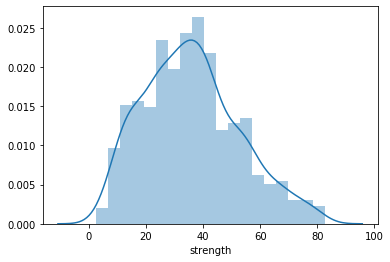

In [29]:
sns.distplot(df['strength'])

In [30]:
print("Skewness = ",df['strength'].skew())

Skewness =  0.416977288410718


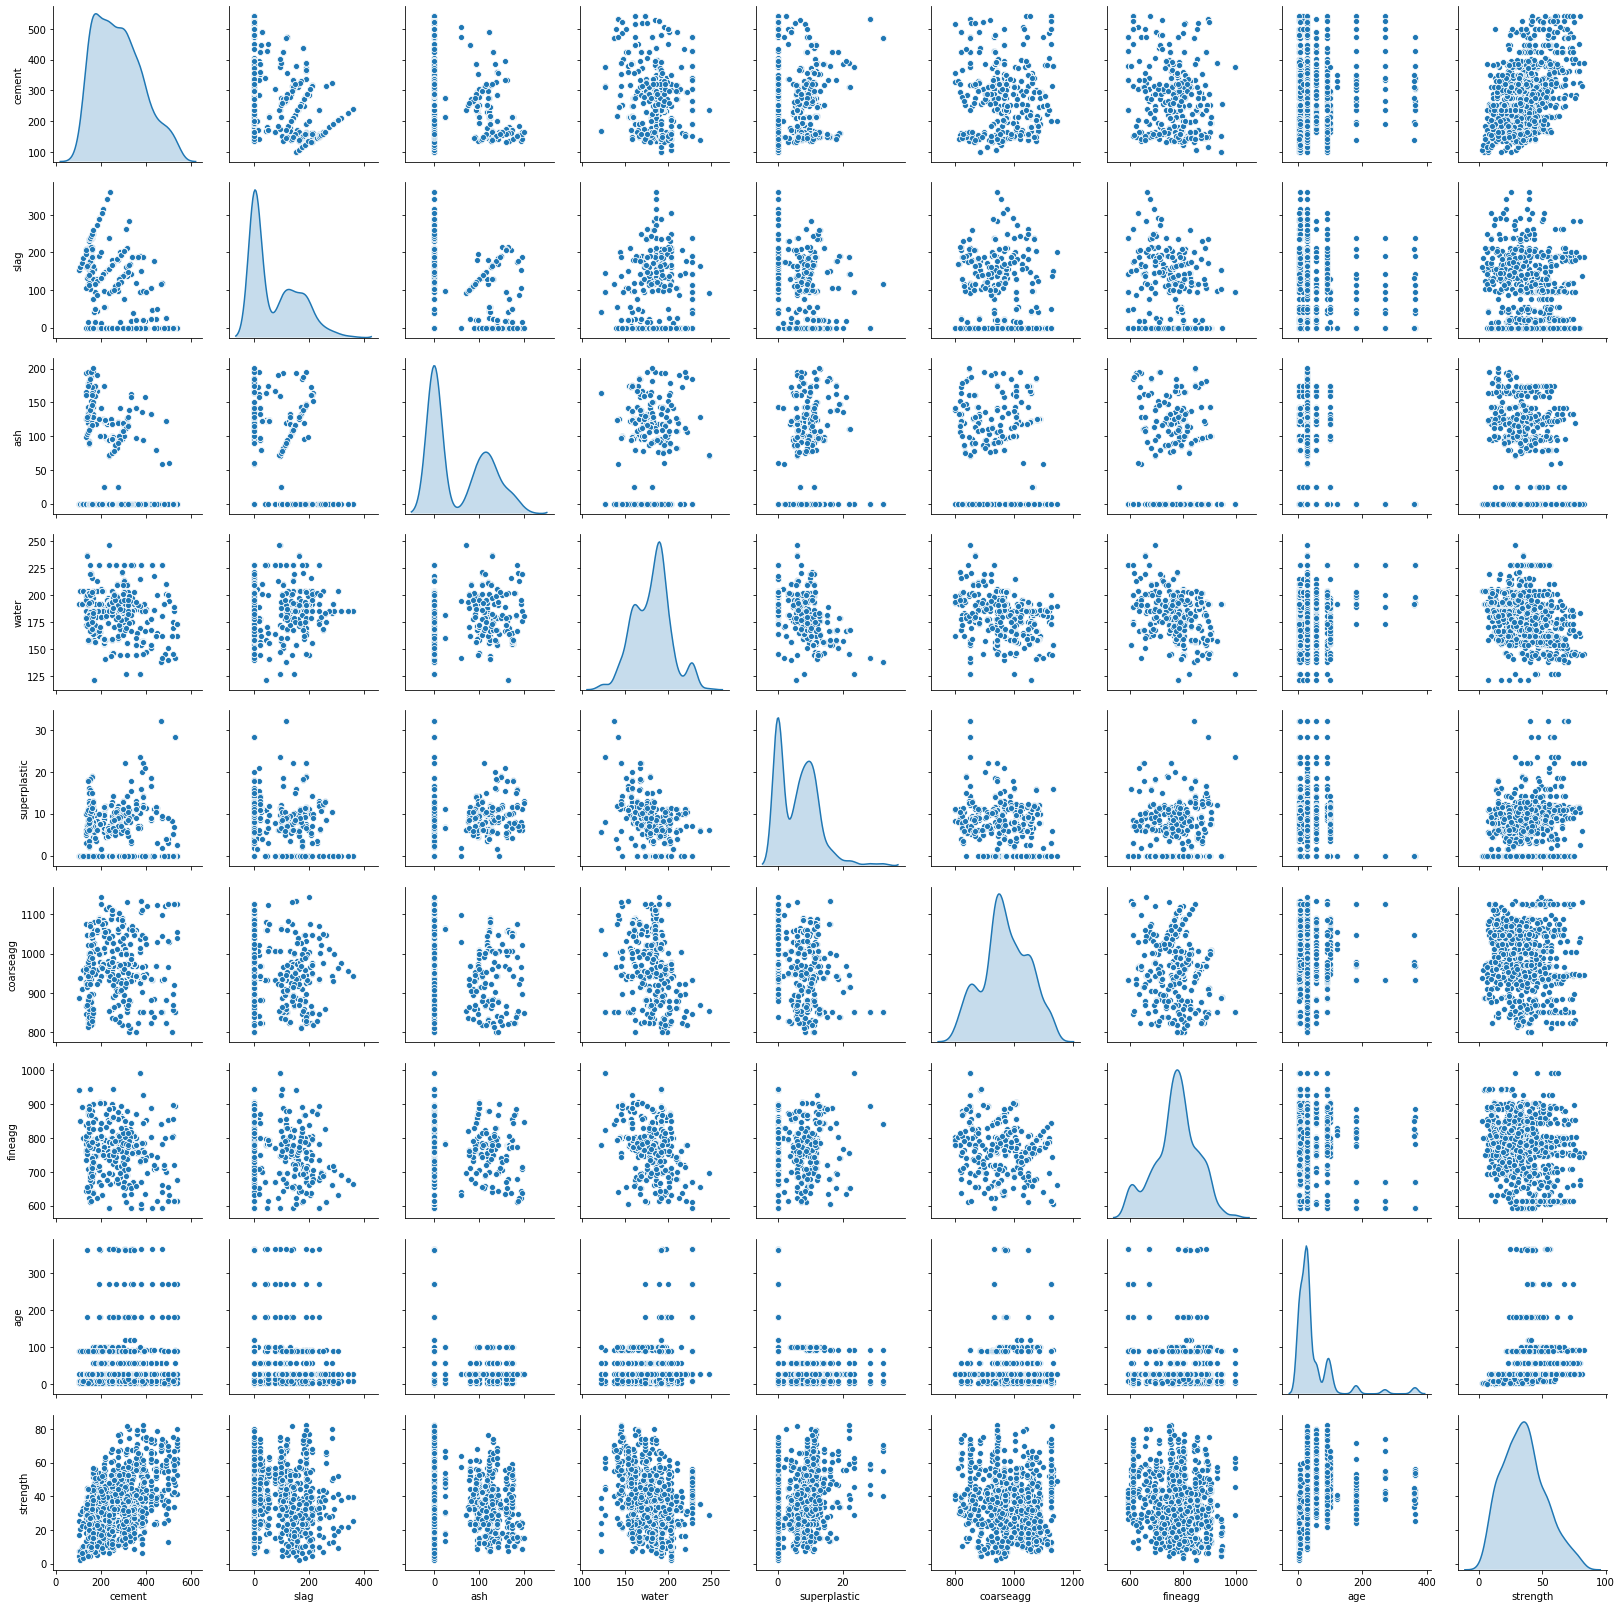

In [31]:
sns.pairplot(df, diag_kind='kde')

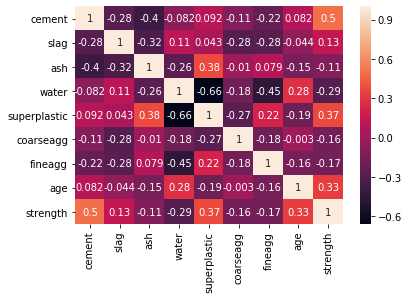

In [32]:
corr_DF = df.corr()
sns.heatmap(corr_DF, annot = True)

In [33]:
data_to_normalize = df.iloc[:,:-1]
scaler = MinMaxScaler()
scaler.fit_transform(data_to_normalize)

array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
        0.07417582],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
        0.07417582],
       [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
        0.07417582],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
        0.07417582]])

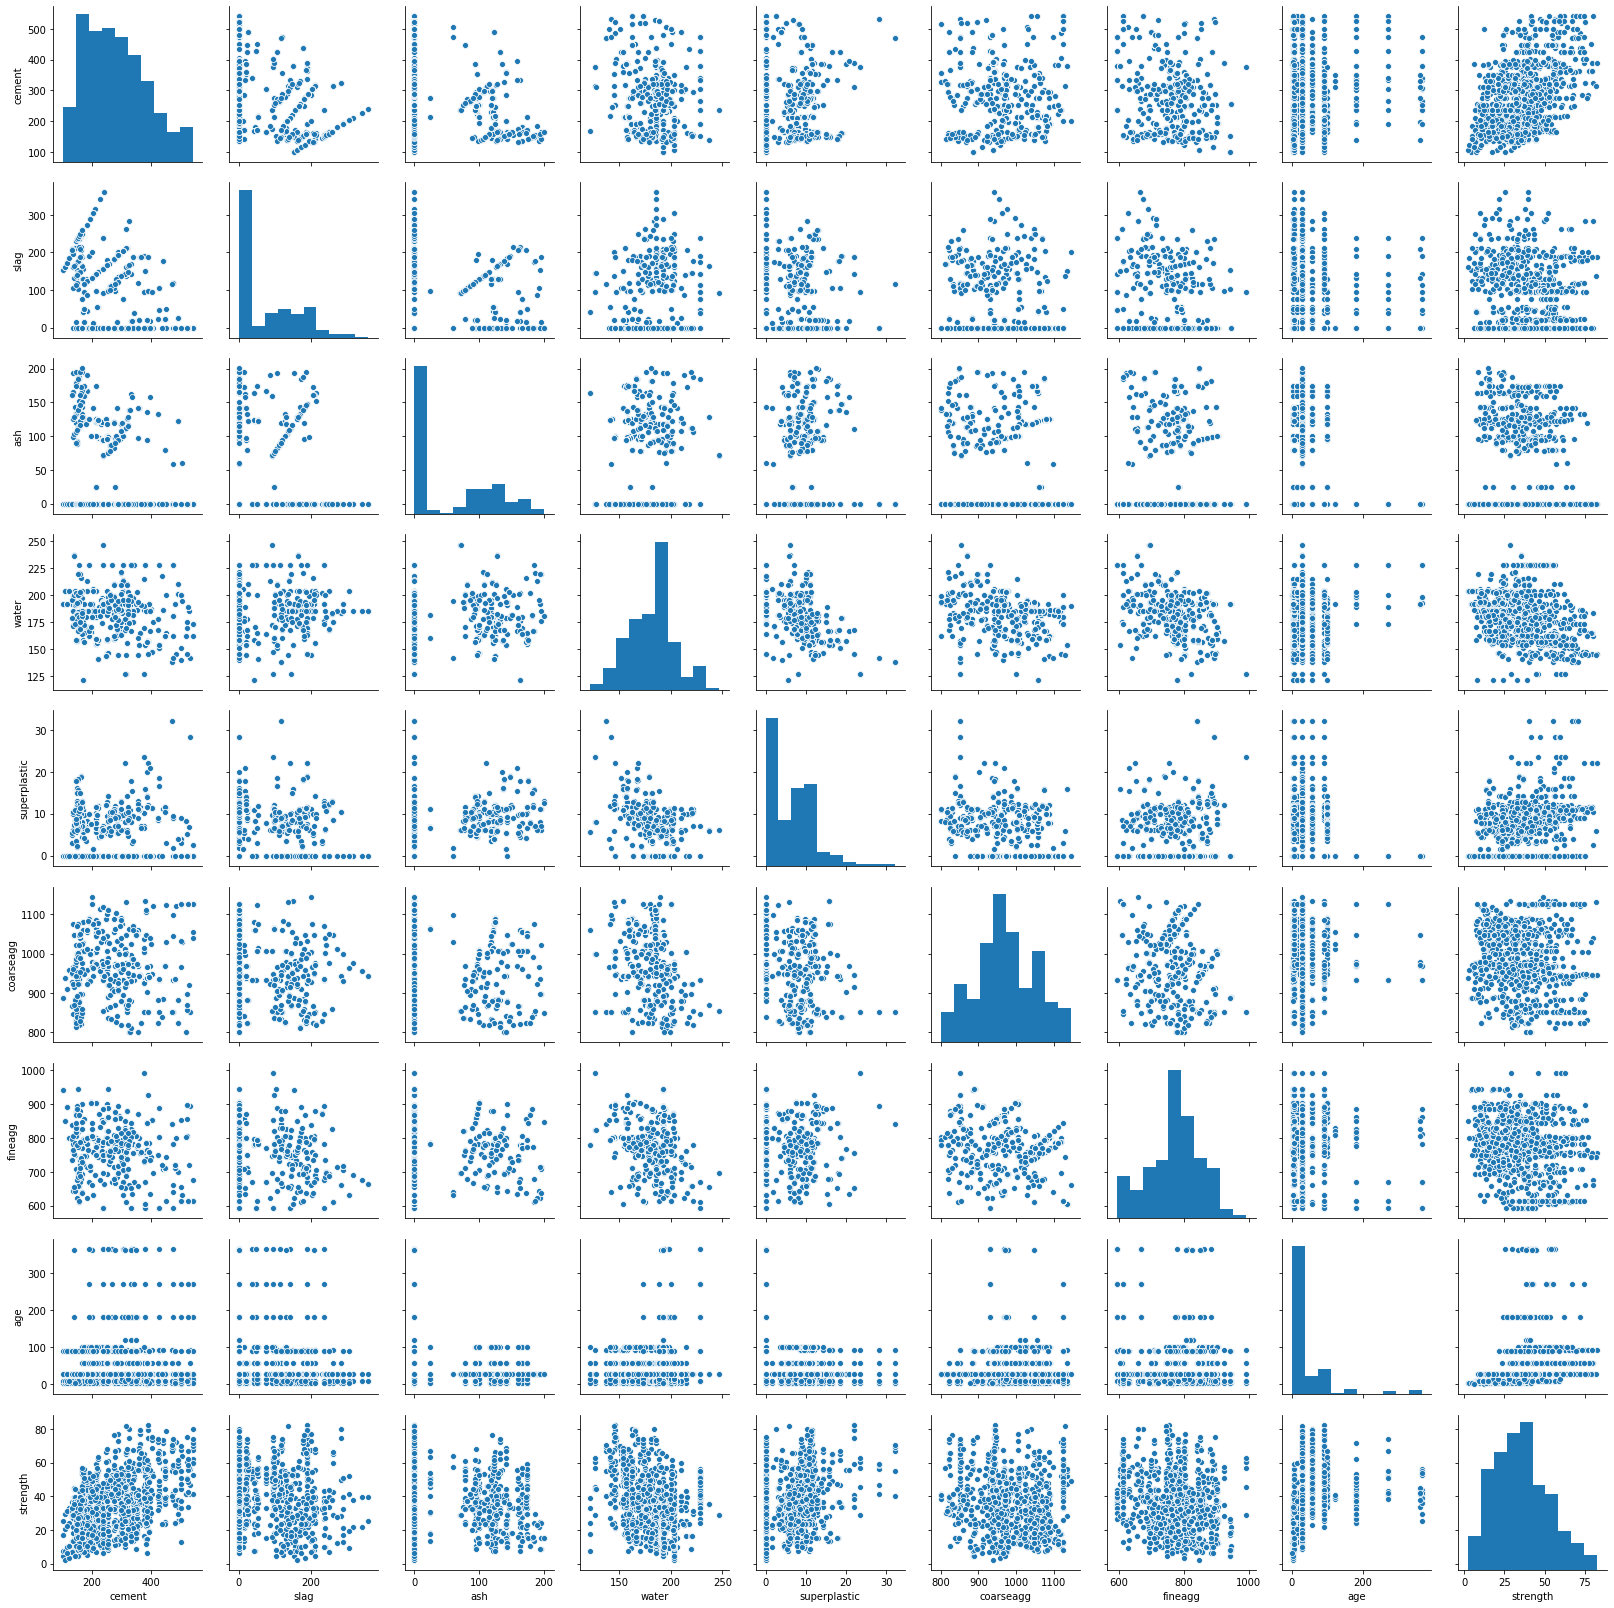

In [34]:
data_to_normalize['strength'] = df['strength']
sns.pairplot(data_to_normalize)

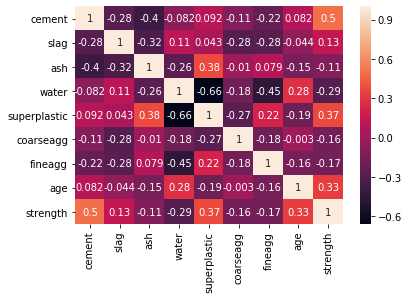

In [35]:
corr_normalised_Data = data_to_normalize.corr()
sns.heatmap(corr_normalised_Data, annot = True)

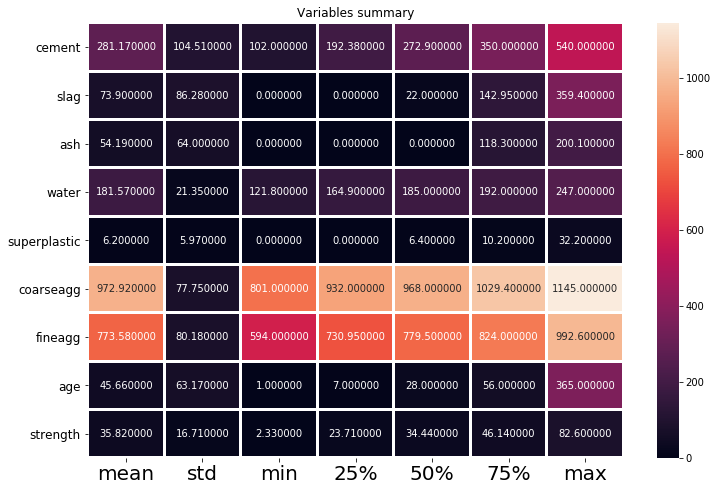

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [37]:
def label(data):
    if data["age"] <= 30:
        return "1 month"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2 months"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3 months"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4 months"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5 months"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6 months"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7 months"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8 months"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9 months"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10 months"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11 months"
    if data["age"] > 330 :
        return "12 months"
df["age_months"] = df.apply(lambda df:label(df) , axis=1)

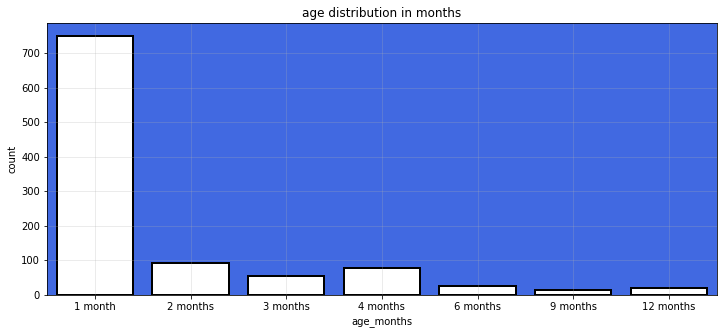

In [38]:
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(df["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("royalblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()